In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import scipy.optimize

In [5]:
np.random.seed(42)
alpha = np.random.random()
beta = np.random.random()
xk = []
yk = []
k = 100
for i in range (k+1):
    xk.append(i/k)
    yk.append( alpha * xk[i] + beta + np.random.randn())
xk = np.asarray(xk)
yk = np.asarray(yk)

In [6]:
def LnrApprox(x, a, b):
    return a * x + b

def RatioApprox(x, a, b):
    return a / (1+b*x)

def OptiCostLin(params, real, x):
    a, b = params
    error =  sum((real - LnrApprox(x, a, b))**2) 
    return error
def OptiCostRatio(params, real, x ):
    a, b = params 
    error = sum((real - RatioApprox(x, a, b))**2)
    return error

def Norm(a0, b0, a, b):
    return ((a - a0) ** 2 + (b - b0) ** 2) ** 0.5



 Derivates of MSE 
For Linear Approx: 
$$ \frac{d}{da} ((a + bx) - y)^{2} = 2 x (a + bx - y) $$
$$ \frac{d}{db} ((a + bx) - y)^{2} = 2 (a + bx - y) $$

Derivates of MSE for Rational approx:
$$ \frac{d}{da} (\frac{a}{1 + bx} - y)^{2} = \frac {2}{1 + bx}(\frac{a}{1 + bx} - y) =  \frac {2}{(1 + bx)^2} (a - y - ybx)$$
$$ \frac{d}{db} (\frac{a}{1 + bx} - y)^{2} = 2 ( \frac{a} {1 + bx} - y) a ( \frac{1}{1+bx^{'}}) = - \frac{2a}{1+bx}(a -y - ybx)\frac{1}{(1 + bx)^{2}} x = - 2ax ( a- y - ybx) \frac{1}{(1+bx)^{3}}$$

In [68]:

def Gradient_Lin(a, b):
    grad = np.zeros(2)
    grad[0] = (2) / 101 * sum(xk * (a * xk + b - yk ))
    grad[1] = (2) / 101 * sum((a * xk + b- yk))
    return grad

def Gradient_Ratio(a, b):
    grad = np.zeros(2)
    grad[0] = (2)/101 * sum((a - b * xk * yk - yk) / (b*xk + 1)**2)
    grad[1] = (-2)/101 * sum(a * xk * (a - yk * (b*xk + 1)) / (b * xk + 1) ** 3)
    return grad
        
        

In [69]:

def GradientDes( func, eps, step):
    a, b = 0, 0
    iters = 0
    calls = 1
    while True:
        a0, b0 = a, b
        if func == 'LnrApprox':
            a = a - step * Gradient_Lin(a,b)[0]
            b = b - step * Gradient_Lin(a, b) [1]
        elif func == 'RatioApprox':
            a = a - step * Gradient_Ratio(a,b)[0]
            b = b - step * Gradient_Ratio(a,b)[1]
        iters += 1
        if Norm(a0, b0, a, b) < eps:
            break

    return a, b, iters, calls+iters



In [76]:
Lin_GradDes = GradientDes( 'LnrApprox', 0.001, 0.01)
print (Lin_GradDes)
print ('________________________________________')
Lin_Conjugate_Grad = scipy.optimize.minimize(OptiCostLin, x0 = [0, 0], args=(yk, xk ), tol=0.001, method='CG')
print (Lin_Conjugate_Grad) 
# Lib scipy.optimize.minimize doesn't have direct realization of Newton's method so we try some modifications 
Lin_BFGS = scipy.optimize.minimize(OptiCostLin, x0 = [0, 0], args=(yk, xk ), tol=0.001, method='BFGS')
print ('________________________________________')
print (Lin_BFGS) 
Lin_TNC = scipy.optimize.minimize(OptiCostLin, x0 = [0, 0], args=(yk, xk ), tol=0.001, method='TNC')
print ('________________________________________')
print (Lin_TNC) 
#Error function in vector type:
def OptiCostVectLin(params, real, x):
    a, b = params
    error =  (real - LnrApprox(x, a, b))
    return error

Lin_LMA = scipy.optimize.least_squares(OptiCostVectLin, [0, 0],args=(yk, xk ), method='lm', xtol=0.001)
print ('________________________________________')
print ('LMA')
print(Lin_LMA)


(0.4124943252843855, 0.7617224433290966, 124, 125)
________________________________________
     fun: 83.07382697914983
     jac: array([1.90734863e-06, 0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 15
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([0.43877717, 0.79065684])
________________________________________
      fun: 83.07382697914996
 hess_inv: array([[ 0.05824116, -0.02912061],
       [-0.02912061,  0.01951081]])
      jac: array([-2.86102295e-06, -3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.43877702, 0.7906569 ])
________________________________________
     fun: 83.07454190917846
     jac: array([-0.05843646,  0.17867165])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 63
     nit: 4
  status: 1
 success: True
       x: array([0.43017063, 0.79584465])
________________________________________
LMA
 active_mas

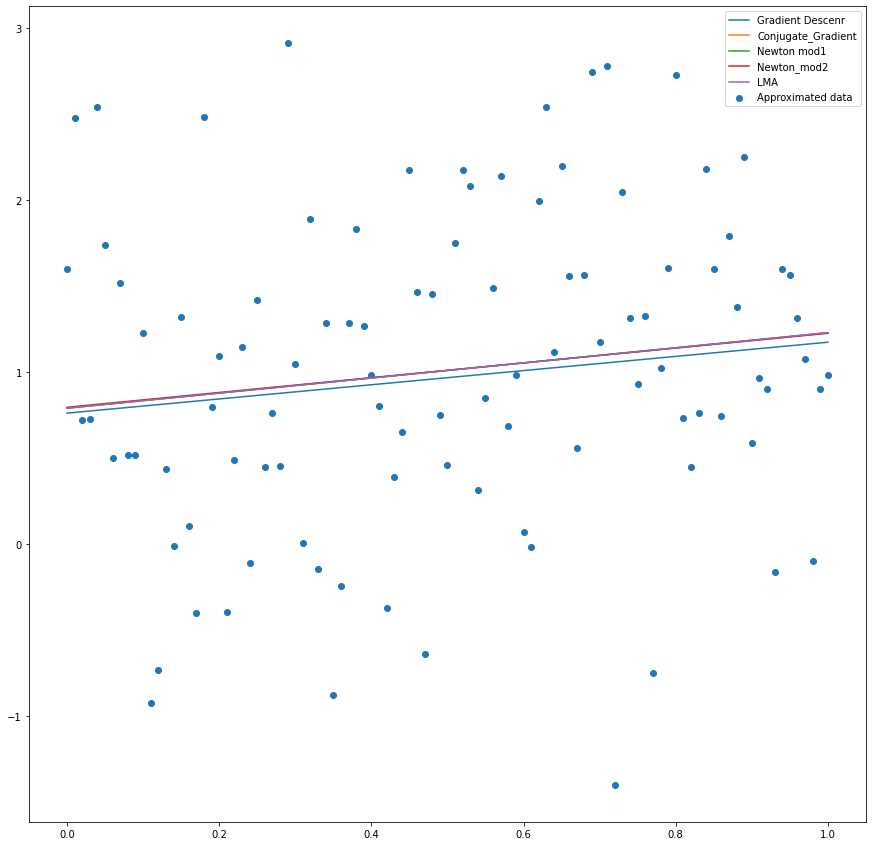

In [81]:
plt.figure(figsize = (15, 15))
plt.scatter(xk, yk)
plt.plot(xk, LnrApprox(xk, Lin_GradDes[0], Lin_GradDes[1]))
plt.plot(xk, LnrApprox(xk, Lin_Conjugate_Grad.x[0], Lin_Conjugate_Grad.x[1]))
plt.plot(xk, LnrApprox(xk, Lin_BFGS.x[0], Lin_BFGS.x[1]))
plt.plot(xk, LnrApprox(xk, Lin_TNC.x[0], Lin_TNC.x[1]))
plt.plot(xk, LnrApprox(xk, Lin_LMA.x[0], Lin_LMA.x[1]))
plt.legend(['Gradient Descenr', 'Conjugate_Gradient', 'Newton mod1', 'Newton_mod2', 'LMA', 'Approximated data'])
plt.savefig('f-o_methods_lin')

In [78]:
Ratio_GradDes = GradientDes( 'RatioApprox', 0.001, 0.01)
print (Ratio_GradDes)
print ('________________________________________')
Ratio_Conjugate_Grad = scipy.optimize.minimize(OptiCostRatio, x0 = [0, 0], args=(yk, xk ), tol=0.001, method='CG')
print (Ratio_Conjugate_Grad) 
# Lib scipy.optimize.minimize doesn't have direct realization of Newton's method so we try some modifications 
Ratio_BFGS = scipy.optimize.minimize(OptiCostRatio, x0 = [0, 0], args=(yk, xk ), tol=0.001, method='BFGS')
print ('________________________________________')
print (Ratio_BFGS) 
Ratio_TNC = scipy.optimize.minimize(OptiCostRatio, x0 = [0, 0], args=(yk, xk ), tol=0.001, method='TNC')
print ('________________________________________')
print (Ratio_TNC) 
#Error function in vector type:
def OptiCostVectRatio(params, real, x):
    a, b = params
    error =  (real - RatioApprox(x, a, b))
    return error

Rati_LMA = scipy.optimize.least_squares(OptiCostVectRatio, [0, 0],args=(yk, xk ), method='lm', xtol=0.001)
print ('________________________________________')
print ('LMA')
print(Rati_LMA)

(0.8578863478532449, -0.2460934835490716, 122, 123)
________________________________________
     fun: 83.16368036121077
     jac: array([-0.0005722 ,  0.00075245])
 message: 'Optimization terminated successfully.'
    nfev: 75
     nit: 8
    njev: 25
  status: 0
 success: True
       x: array([ 0.83266533, -0.32999832])
________________________________________
      fun: 83.16368036848559
 hess_inv: array([[0.01425462, 0.01649052],
       [0.01649052, 0.02538542]])
      jac: array([ 4.38690186e-05, -9.44137573e-04])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 7
     njev: 11
   status: 0
  success: True
        x: array([ 0.8326492 , -0.33002743])
________________________________________
     fun: 83.16387985015835
     jac: array([0.05947953, 0.09459882])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 60
     nit: 6
  status: 1
 success: True
       x: array([ 0.83468863, -0.32707146])
________________________________________
LMA
 active_mask: 

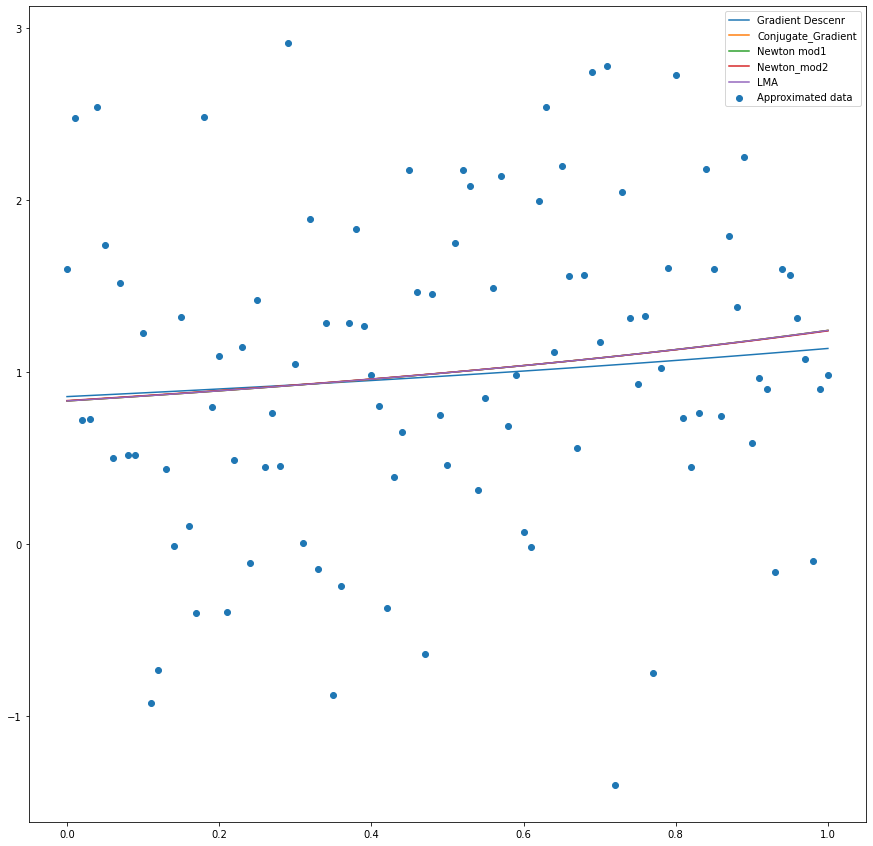

In [82]:
plt.figure(figsize = (15, 15))
plt.scatter(xk, yk)
plt.plot(xk, RatioApprox(xk, Ratio_GradDes[0], Ratio_GradDes[1]))
plt.plot(xk, RatioApprox(xk, Ratio_Conjugate_Grad.x[0], Ratio_Conjugate_Grad.x[1]))
plt.plot(xk, RatioApprox(xk, Ratio_BFGS.x[0], Ratio_BFGS.x[1]))
plt.plot(xk, RatioApprox(xk, Ratio_TNC.x[0], Ratio_TNC.x[1]))
plt.plot(xk, RatioApprox(xk, Rati_LMA.x[0], Rati_LMA.x[1]))
plt.legend(['Gradient Descenr', 'Conjugate_Gradient', 'Newton mod1', 'Newton_mod2', 'LMA', 'Approximated data'])
plt.savefig('f-o_methods_ratio')